In [1]:
import sys, pandas
sys.path.append('/home/stephan/python/clearpond')
import clearpond
import rpy2.robjects.lib.ggplot2 as ggplot2
%load_ext rpy2.ipython

/usr/local/lib/python2.7/dist-packages/rpy2/robjects/lib/ggplot2.py:59: UserWarning: This was designed againt ggplot2 version 2.0.0 but you have 2.1.0
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


In [2]:
cp = clearpond.NeighborhoodDictionary('data/clearpond/englishCPdatabase2.txt')

In [3]:
cp_lengths = pandas.DataFrame([{'word':x,'wordLength':len(x), 'numNeighbors': len(cp.phoneNeighbors[x])} for x in cp.phoneNeighbors.keys()])
%R -i cp_lengths

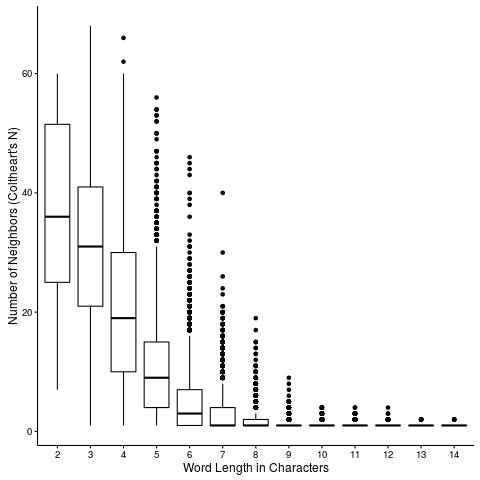

In [4]:
%%R
library('colorRamps')
library('ggplot2')
library('hexbin')
p1 = ggplot(subset(cp_lengths, wordLength <= 14 & wordLength >=2 )) + geom_boxplot(aes(x=as.factor(wordLength),y=numNeighbors),
colour='black') + xlab('Word Length in Characters') + ylab("Number of Neighbors (Coltheart's N)") + theme_bw() + theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    axis.line.x = element_line(colour='black'),
    axis.line.y = element_line(colour='black')) 
print(p1)